# Import Libraries

In [1]:
#Import Libraries

#for reading and data-manipulation
import os
import numpy as np
import pandas as pd

In [2]:
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [3]:
#for data preprocessing
import time
from contractions import contractions_dict
import re
from collections import Counter
from wordcloud import STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# for ML model Implementation
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from bertopic import BERTopic
from sklearn.metrics import silhouette_score
import hdbscan
from sentence_transformers import SentenceTransformer
from umap import UMAP

/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# This code avoids printing different warnings in following jupyter cells.
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)
# warnings.simplefilter("ignore", category=SettingWithCopyWarning)


# Import CSV file.

In [6]:
df = pd.read_csv('GlobalNewsDataset/data.csv', encoding='ISO-8859-1')
df.head()

article_id source_id                   source_name  \
0       89541       NaN  International Business Times   
1       89542       NaN                    Prtimes.jp   
2       89543       NaN                      VOA News   
3       89545       NaN            The Indian Express   
4       89547       NaN           The Times of Israel   

                                       author  \
0                              Paavan MATHEMA   
1                                         NaN   
2  webdesk@voanews.com (Agence France-Presse)   
3                                   Editorial   
4                                 Jacob Magid   

                                               title  \
0  UN Chief Urges World To 'Stop The Madness' Of ...   
1  RANDEBOOããã¯ã³ã©ã³ã¯ä¸ã®å¤§äººã£ã...   
2  UN Chief Urges World to 'Stop the Madness' of ...   
3  Sikkim warning: Hydroelectricity push must be ...   
4  200 foreigners, dual nationals cut down in Ham...   

                                         description  \
0  UN Secretary-General Antonio Guterres urged th...   
1  [æ ªå¼ä¼ç¤¾Ainer]\nRANDEBOOï¼ã©ã³ããã...   
2  UN Secretary-General Antonio Guterres urged th...   
3  Ecologists caution against the adverse effects...   
4  France lost 35 citizens, Thailand 33, US 31, U...   

                                                 url  \
0  https://www.ibtimes.com/un-chief-urges-world-s...   
1  https://prtimes.jp/main/html/rd/p/000000147.00...   
2  https://www.voanews.com/a/un-chief-urges-world...   
3  https://indianexpress.com/article/opinion/edit...   
4  https://www.timesofisrael.com/200-foreigners-d...   

                                        url_to_image  \
0  https://d.ibtimes.com/en/full/4496078/nepals-g...   
1  https://prtimes.jp/i/32220/147/ogp/d32220-147-...   
2  https://gdb.voanews.com/01000000-0a00-0242-60f...   
3  https://images.indianexpress.com/2023/10/edit-...   
4  https://static.timesofisrael.com/www/uploads/2...   

                 published_at  \
0  2023-10-30 10:12:35.000000   
1  2023-10-06 04:40:02.000000   
2  2023-10-30 10:53:30.000000   
3  2023-10-06 01:20:24.000000   
4  2023-10-27 01:08:34.000000   

                                             content category  \
0  UN Secretary-General Antonio Guterres urged th...    Nepal   
1  RANDEBOO2023718()WEB2023 Autumn Winter \n"Nepa...    Nepal   
2  Kathmandu, Nepal Â UN Secretary-General Antoni...    Nepal   
3  At least 14 persons lost their lives and more ...    Nepal   
4  Scores of foreign citizens were killed, taken ...    Nepal   

                                        full_content  
0  UN Secretary-General Antonio Guterres urged th...  
1                                                NaN  
2                                                NaN  
3  At least 14 persons lost their lives and more ...  
4                                                NaN

In [7]:
df.category.value_counts().iloc[0:20]

category
Stock          3999
Health         2594
Finance        2402
Technology     2371
Real estate    2352
Canada         2324
News           1852
COVID          1821
Education      1771
Food           1613
Jobs           1562
Weather        1496
Travel         1451
Cars           1289
Science        1261
Asia           1242
India          1196
Music          1159
Politics       1156
Climate        1140
Name: count, dtype: int64

In [8]:
# Define the list of categories you want to keep
categories_to_keep = ['Stock', 'Health', 'Finance', 'Technology', 'Real estate', 'COVID', 
                      'Education', 'Food', 'Jobs', 'Weather', 'Travel', 'Cars', 
                      'Science', 'Music', 'Politics', 'Climate']

# Filter the dataframe to keep only the records with the desired categories
df_filtered = df[df['category'].isin(categories_to_keep)]

# Verify the filtered data
df_filtered['category'].value_counts()


category
Stock          3999
Health         2594
Finance        2402
Technology     2371
Real estate    2352
COVID          1821
Education      1771
Food           1613
Jobs           1562
Weather        1496
Travel         1451
Cars           1289
Science        1261
Music          1159
Politics       1156
Climate        1140
Name: count, dtype: int64

In [9]:
df = df_filtered.rename(columns={'article_id': 'unique_identifier', 'content': 'brief_review'})

In [10]:
df = df[['unique_identifier', 'brief_review', 'category']].dropna()

In [11]:
# Handling missing values
df.isnull().sum()

unique_identifier    0
brief_review         0
category             0
dtype: int64

In [12]:
#handling duplicate values 
len(df[df.duplicated(subset=['brief_review'])])

2952

In [13]:
# Drop duplicate 
df_cleaned = df.drop_duplicates(subset = ["brief_review"])
print(df_cleaned.head())

      unique_identifier                                       brief_review  \
556               95201  <ul><li>Samia says the two nations will addres...   
961               96533  Environmental Defenders Face Harassment, Intim...   
1280              93416  WeWork has seen a dramatic fall from grace sin...   
1289              93553  Orlando real estate agent and content creator ...   
1393             105026  Piers, Roxie, and Ryuki rock Pasio with a publ...   

         category  
556      Politics  
961       Climate  
1280  Real estate  
1289  Real estate  
1393      Weather  


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26485 entries, 556 to 104690
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   unique_identifier  26485 non-null  int64 
 1   brief_review       26485 non-null  object
 2   category           26485 non-null  object
dtypes: int64(1), object(2)
memory usage: 827.7+ KB


# Text Preprocessing

In [15]:
# Expand Contraction

# Function to expand contractions using the contractions_dict
def expand_contractions(text):
    # Regular expression pattern to match contractions
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded = contractions_dict.get(match.lower())
        return expanded

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Apply the expand_contractions function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(expand_contractions)

In [16]:
# Convert text in the "brief_review" column to lowercase
df_cleaned['brief_review'] = df_cleaned['brief_review'].str.lower()

In [17]:
# Remove Punctuations

# Function to remove punctuations from text
def remove_punctuations(text):
    # Create a translation table to remove punctuations
    translator = str.maketrans('', '', string.punctuation +'\n')

    # Apply the translation table to remove punctuations
    text_without_punctuations = text.translate(translator)
    return text_without_punctuations

# Apply the remove_punctuations function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_punctuations)

In [18]:
# Function to remove URLs from text
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(url_pattern, '', text)

# Function to remove words containing digits from text
def remove_words_with_digits(text):
    return ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

# Function to remove non-ASCII characters (special characters)
def remove_special_characters(text):
    # Replace non-ASCII characters with a space
    return re.sub(r'[^\x00-\x7F]+', ' ', text)

# Apply the remove_urls function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_urls)

# Apply the remove_words_with_digits function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_words_with_digits)

# Apply the remove_special_characters function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_special_characters)

# Verify the cleaned data
df_cleaned['brief_review'].head()


556     ullisamia says the two nations will address sh...
961     environmental defenders face harassment intimi...
1280    wework has seen a dramatic fall from grace sin...
1289    orlando real estate agent and content creator ...
1393    piers roxie and ryuki rock pasio with a public...
Name: brief_review, dtype: object

In [20]:
#THIS IS THE CODE TO REMOVE THE REVIEWS/NEWS-articles WITH WORD COUNT<=5
# Function to filter reviews based on word count
def filter_short_reviews(text, min_word_count=5):
    return len(text.split()) >= min_word_count

# Apply the filter function to the "brief_review" column and keep only reviews with word count >= 5
df_cleaned = df_cleaned[df_cleaned['brief_review'].apply(filter_short_reviews)]

# Verify the filtered data
df_cleaned['brief_review'].head()


556     ullisamia says the two nations will address sh...
961     environmental defenders face harassment intimi...
1280    wework has seen a dramatic fall from grace sin...
1289    orlando real estate agent and content creator ...
1393    piers roxie and ryuki rock pasio with a public...
Name: brief_review, dtype: object

In [21]:
 # Remove Stopwords
# Download the list of stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Add unnecessary words to the list of English stopwords
stop_unnecessary_words = stop_words.union(set(['mr', 'people', 'would', 'year', 'said', 'say', 'also', 'wale', 'could', 'chars', 'inc']))


# Function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if len(word)>2]
    filtered_words = [word for word in words if word.lower() not in stop_unnecessary_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/binitkc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Remove white spaces from the "brief_review" column
df_cleaned['brief_review'] = df_cleaned['brief_review'].str.replace('\s+', ' ', regex=True)

In [23]:
# Shuffle the data
df_shuffled = df_cleaned.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled.head()

unique_identifier                                       brief_review  \
0             143921  urenergy nyseamericanurg get free report tseur...   
1             143573  volatus aerospace corp cvevol get free report ...   
2             209738  delhi environment minister gopal rai announced...   
3             110342  tokyo nippon steel corp dropped lawsuit toyota...   
4             109632  councillors preparing thon meetings lansdowne ...   

     category  
0       Stock  
1       Stock  
2        Cars  
3  Technology  
4       Music

In [24]:
df_shuffled.category.iloc[1:10001].value_counts()

category
Stock          1373
Health          872
Real estate     826
Technology      807
Finance         751
COVID           619
Education       592
Food            550
Jobs            533
Weather         525
Travel          484
Cars            446
Music           443
Science         421
Climate         409
Politics        349
Name: count, dtype: int64

# Fitting BEST Model

In [25]:
# We need to convert the df (series) to list for passing to BERTopic.
sentenceList = df_cleaned["brief_review"].tolist()
samplesentenceList = sentenceList[1:10001]

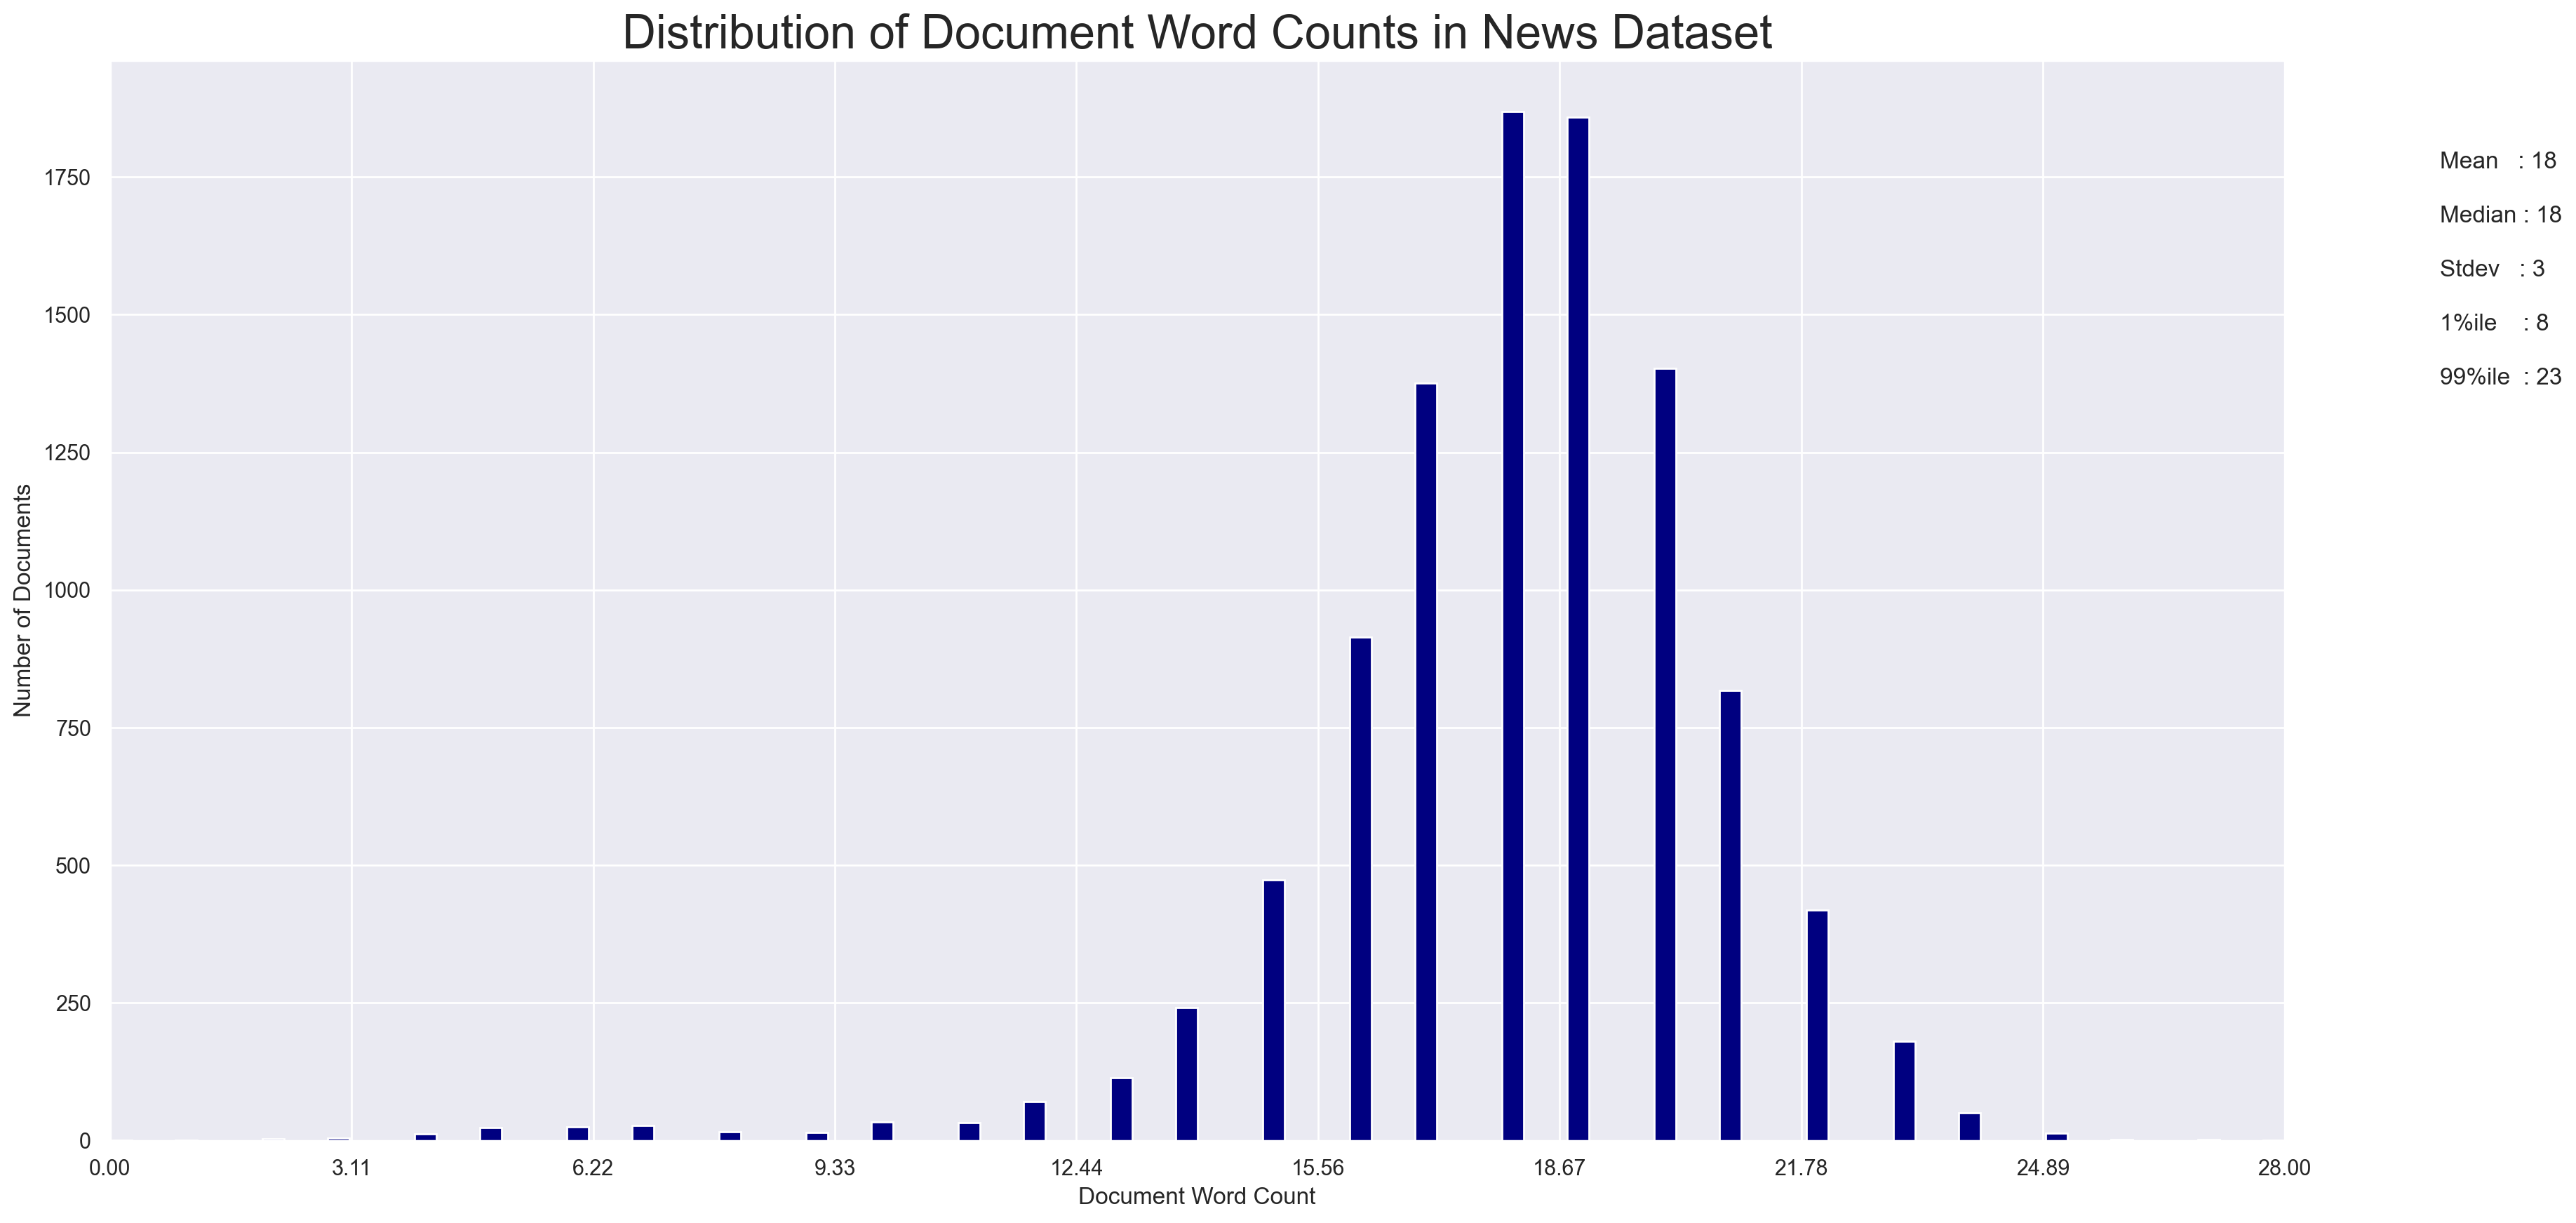

In [79]:
# Calculate the length of each sentence (word count)
sentence_lens = [len(sentence.split()) for sentence in samplesentenceList]

# Plot with larger figure size and higher resolution
plt.figure(figsize=(20, 10), dpi=200)  # Adjust as needed
plt.hist(sentence_lens, bins=100, color='navy')

# Add statistics as text annotations on the left side of the plot
plt.text(30, max(plt.gca().get_ylim()) * 0.9, f"Mean   : {round(np.mean(sentence_lens))}", fontsize=12)
plt.text(30, max(plt.gca().get_ylim()) * 0.85, f"Median : {round(np.median(sentence_lens))}", fontsize=12)
plt.text(30, max(plt.gca().get_ylim()) * 0.8, f"Stdev   : {round(np.std(sentence_lens))}", fontsize=12)
plt.text(30, max(plt.gca().get_ylim()) * 0.75, f"1%ile    : {round(np.quantile(sentence_lens, q=0.01))}", fontsize=12)
plt.text(30, max(plt.gca().get_ylim()) * 0.7, f"99%ile  : {round(np.quantile(sentence_lens, q=0.99))}", fontsize=12)

# Configure plot settings
plt.gca().set(xlim=(0, max(sentence_lens)), ylabel='Number of Documents', xlabel='Document Word Count')
plt.xticks(np.linspace(0, max(sentence_lens), 10))
plt.title('Distribution of Document Word Counts in News Dataset', fontdict={'size': 24})
plt.show()

In [66]:
import json

# Save the list to a JSON file
with open("samplesentenceList.json", "w") as file:
    json.dump(samplesentenceList, file)


In [26]:
len(samplesentenceList)

10000

In [27]:
# Step 1: Embed the Texts
embedding_model = SentenceTransformer('paraphrase-MiniLM-L3-v2')
embeddings = embedding_model.encode(samplesentenceList)

In [29]:
# Step 2: Dimensionality Reduction using UMAP or PCA
# Option 1: UMAP
umap_model = UMAP(n_components=5, random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [30]:
# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_embeddings)
kmeans_silhouette = silhouette_score(reduced_embeddings, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


KMeans Silhouette Score: 0.26741519570350647


In [31]:
# HDBSCAN Clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, cluster_selection_method='eom')
hdbscan_labels = hdbscan_model.fit_predict(reduced_embeddings)

# Note: Silhouette score works best when there are multiple clusters, and HDBSCAN may assign some points as noise (-1 label).
# Filter out noise points for Silhouette calculation
filtered_embeddings = reduced_embeddings[hdbscan_labels != -1]
filtered_labels = hdbscan_labels[hdbscan_labels != -1]

# Only calculate silhouette score if there are clusters
if len(set(filtered_labels)) > 1:
    hdbscan_silhouette = silhouette_score(filtered_embeddings, filtered_labels)
    print(f"HDBSCAN Silhouette Score: {hdbscan_silhouette}")
else:
    print("HDBSCAN resulted in only one cluster or noise.")

HDBSCAN Silhouette Score: 0.42336413264274597


In [34]:
# Hyper-parameter Tuning.


# Step 2: Define hyperparameter grids
kmeans_params = {'n_clusters': [2, 3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
hdbscan_params = {
    'min_cluster_size': [5, 10, 15, 20, 25, 30],
    'min_samples': [1, 5, 8, 10, 12, 15],
    'cluster_selection_method': ['eom', 'leaf']
}

# Step 3: Evaluate KMeans
kmeans_results = []
for n_clusters in kmeans_params['n_clusters']:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(reduced_embeddings)
    score = silhouette_score(reduced_embeddings, labels)
    kmeans_results.append({'Algorithm': 'KMeans', 'n_clusters': n_clusters, 'Silhouette Score': score})

# Step 4: Evaluate HDBSCAN
hdbscan_results = []
for min_cluster_size in hdbscan_params['min_cluster_size']:
    for min_samples in hdbscan_params['min_samples']:
        for method in hdbscan_params['cluster_selection_method']:
            hdbscan_model = hdbscan.HDBSCAN(
                min_cluster_size=min_cluster_size,
                min_samples=min_samples,
                cluster_selection_method=method
            )
            labels = hdbscan_model.fit_predict(reduced_embeddings)
            # Skip noise points for Silhouette Score calculation
            if len(set(labels)) > 1:  # Ensure there are clusters
                score = silhouette_score(reduced_embeddings, labels)
                hdbscan_results.append({
                    'Algorithm': 'HDBSCAN',
                    'min_cluster_size': min_cluster_size,
                    'min_samples': min_samples,
                    'cluster_selection_method': method,
                    'Silhouette Score': score
                })

# Step 5: Combine results and display in a table
all_results = pd.DataFrame(kmeans_results + hdbscan_results)
sorted_results = all_results.sort_values(by='Silhouette Score', ascending=False)

# print(sorted_results)


In [35]:
# Print the best result
best_result = sorted_results.iloc[0]
print("\nBest Result:")
print(best_result)


Best Result:
Algorithm                   HDBSCAN
n_clusters                      NaN
Silhouette Score            0.66701
min_cluster_size               20.0
min_samples                     8.0
cluster_selection_method        eom
Name: 53, dtype: object


# Model Training

In [44]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(
    min_cluster_size=20,
    min_samples=8,
    cluster_selection_method='eom',
    prediction_data=True  # Enables prediction data for probabilities --> to show no error during training.
)

In [45]:
topic_model = BERTopic(
    embedding_model="paraphrase-MiniLM-L3-v2",  # or another pre-trained model
    hdbscan_model=hdbscan_model,
    calculate_probabilities=True,
    verbose=True
)

In [46]:
topics, probs = topic_model.fit_transform(samplesentenceList)


2024-11-15 14:05:14,825 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2024-11-15 14:05:25,064 - BERTopic - Embedding - Completed ✓
2024-11-15 14:05:25,064 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-15 14:05:28,876 - BERTopic - Dimensionality - Completed ✓
2024-11-15 14:05:28,877 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-15 14:05:30,837 - BERTopic - Cluster - Completed ✓
2024-11-15 14:05:30,848 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-15 14:05:31,003 - BERTopic - Representation - Completed ✓


## Coherence Score

In [49]:
# Now retrieve topics and their words
from gensim.corpora.dictionary import Dictionary
topic_words = []
for topic_id in range(len(topic_model.get_topics())):
    # `get_topic` should return a list of word-score pairs for each topic
    topic = topic_model.get_topic(topic_id)
    if topic:  # Make sure the topic is not empty
        words = [word for word, _ in topic]
        topic_words.append(words)

# Tokenize the original documents for coherence calculation
tokenized_docs = [doc.split() for doc in samplesentenceList]

# Create a dictionary and calculate coherence
dictionary = Dictionary(tokenized_docs)
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence="c_v"
)
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/urllib3/__init__.py:35:

Coherence Score: 0.6242624031736498


## Topic Diversity

In [50]:
def topic_diversity_score(topic_model, top_n_words=10):
    all_words = []
    for topic in topic_model.get_topics().values():
        words = [word for word, _ in topic[:top_n_words]]
        all_words.extend(words)
    unique_words = set(all_words)
    return len(unique_words) / len(all_words)

diversity_score = topic_diversity_score(topic_model)
print(f"Topic Diversity Score: {diversity_score}")


Topic Diversity Score: 0.8662921348314607


# Save the Model

In [57]:
# Specify the path where you want to save the model
model_path = "Trained_models/bertopic_news_model"

# Save the trained BERTopic model
topic_model.save(model_path)


2024-11-15 14:14:15,702 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


# Load the saved Model.

In [ ]:
model_path = "Trained_models/bertopic_news_model"

In [58]:
# Load the saved BERTopic model
topic_model = BERTopic.load(model_path)

In [59]:
topic_model.get_topic_info()

Topic  Count                                   Name  \
0      -1   3433         -1_new_apple_announced_company   
1       0    510           0_cars_car_electric_vehicles   
2       1    282            1_gaza_hamas_israel_israeli   
3       2    254          2_jobs_job_labor_unemployment   
4       3    253         3_housing_estate_real_mortgage   
..    ...    ...                                    ...   
84     83     22         83_robots_drone_delivery_robot   
85     84     21  84_micron_technology_microchip_edtech   
86     85     21             85_futures_sampp_jones_dow   
87     86     20           86_trump_donald_empire_never   
88     87     20        87_loki_episode_season_spoilers   

                                       Representation  \
0   [new, apple, announced, company, thursday, tod...   
1   [cars, car, electric, vehicles, vehicle, tesla...   
2   [gaza, hamas, israel, israeli, palestinian, st...   
3   [jobs, job, labor, unemployment, ber, employer...   
4   [housing, estate, real, mortgage, home, city, ...   
..                                                ...   
84  [robots, drone, delivery, robot, starship, bom...   
85  [micron, technology, microchip, edtech, wit, i...   
86  [futures, sampp, jones, dow, aapl, disappointi...   
87  [trump, donald, empire, never, swore, entruste...   
88  [loki, episode, season, spoilers, contains, pr...   

                                  Representative_Docs  
0   [missed wall street expectations third quarter...  
1   [mercedesbenz initially delivered brumos motor...  
2   [israeli forces thursday mber encircled gaza c...  
3   [washington nations employers scaled back hiri...  
4   [around billion potentially distressed commerc...  
..                                                ...  
84  [enlarge file photo starship technologies food...  
85  [analog chipmaker microchip technology nasdaqm...  
86  [dow jones futures tilted lower overnight samp...  
87  [eric trump one two sons entrusted run donald ...  
88  [learn moreloki season theory obs real name hu...  

[89 rows x 5 columns]

In [52]:
# Visualize topic similarity using a 2D representation
topic_model.visualize_topics()

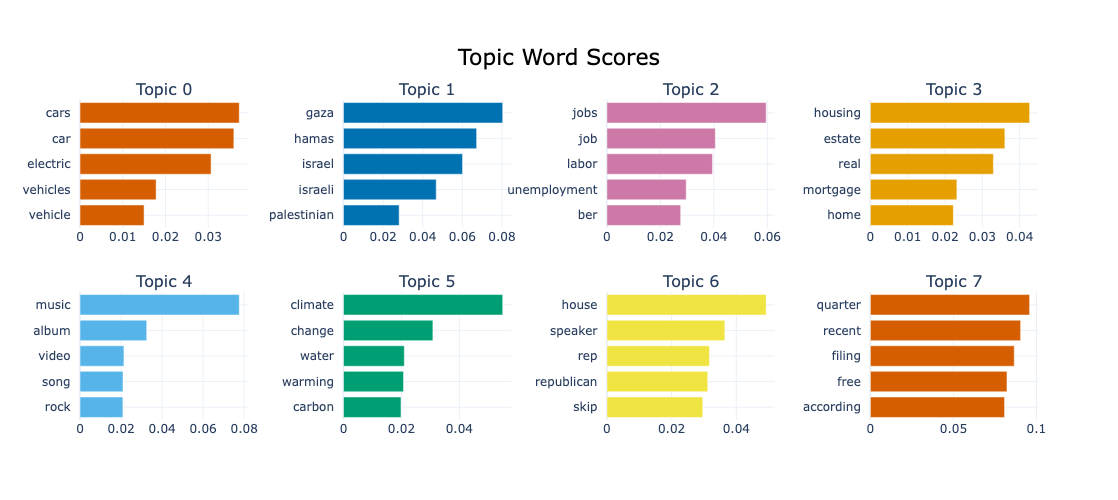

In [54]:
topic_model.visualize_barchart()

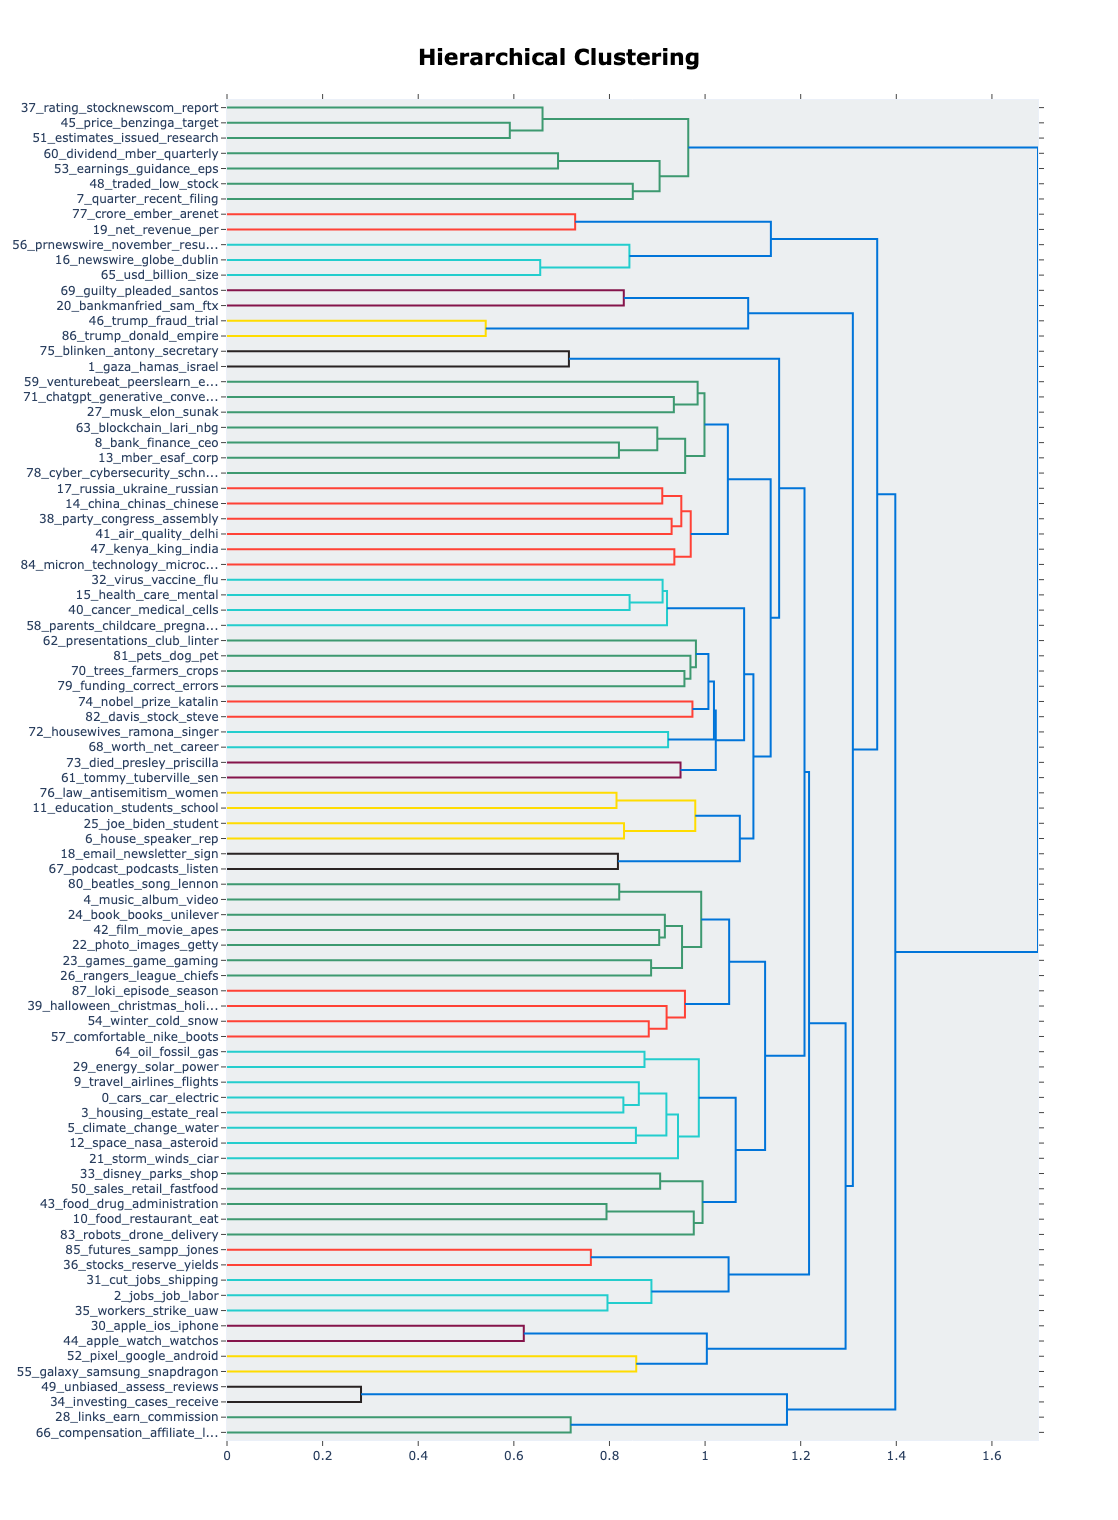

In [53]:

# Or, to visualize hierarchical relationships between topics
topic_model.visualize_hierarchy()

In [45]:
# from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Get the top words for each topic
topic_words = [[word for word, _ in words] for words in topic_model.get_topics().values()]

# Tokenize your documents
tokenized_docs = [doc.split() for doc in samplesentenceList]

# Create a dictionary from the tokenized documents
dictionary = Dictionary(tokenized_docs)

# Calculate coherence using the 'c_v' measure
coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Topic Coherence Score: {coherence_score}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/binitkc/ADS_FiNAL/ADS/lib/python3.9/site-packages/urllib3/__init__.py:35:

Topic Coherence Score: 0.6138396825663079


In [46]:
def topic_diversity(topic_words):
    unique_words = set([word for topic in topic_words for word in topic])
    total_words = sum(len(topic) for topic in topic_words)
    return len(unique_words) / total_words

# Calculate diversity
diversity_score = topic_diversity(topic_words)
print(f"Topic Diversity Score: {diversity_score}")


Topic Diversity Score: 0.8381578947368421


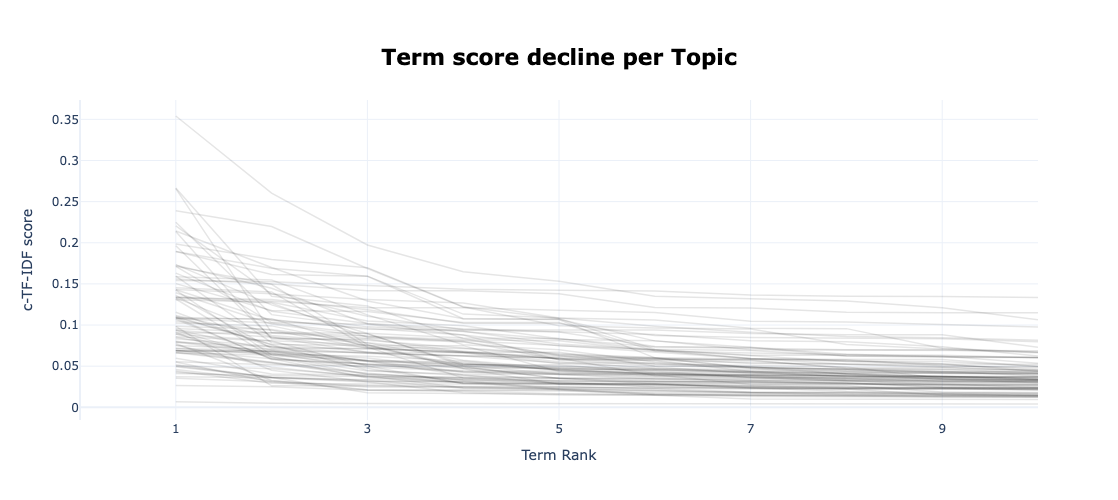

In [55]:
topic_model.visualize_term_rank()

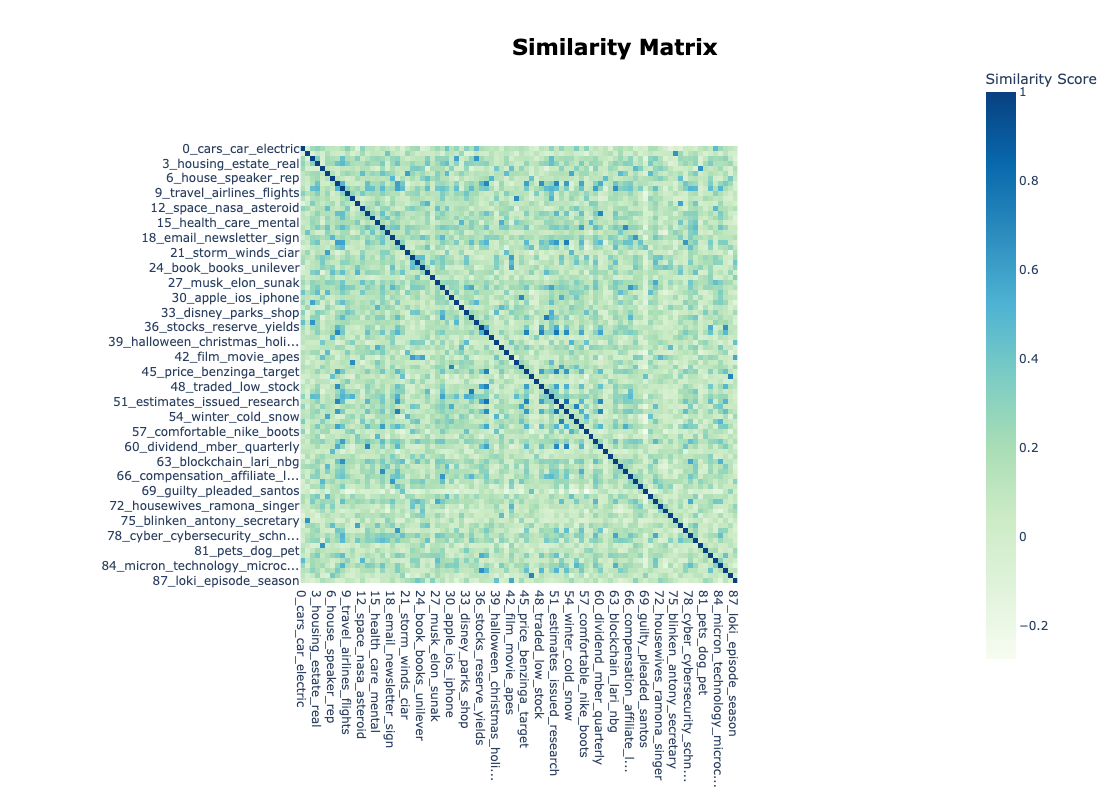

In [56]:
topic_model.visualize_heatmap()

# Testing with unseen data:

In [76]:
topic, probabilities = topic_model.transform(["the market is down"])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-17 10:27:01,796 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 10:27:01,877 - BERTopic - Dimensionality - Completed ✓
2024-11-17 10:27:01,878 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 10:27:01,890 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-11-17 10:27:01,903 - BERTopic - Probabilities - Completed ✓
2024-11-17 10:27:01,903 - BERTopic - Cluster - Completed ✓


In [77]:
probabilities[0]

array([2.03853875e-09, 2.74274468e-09, 5.85284456e-07, 1.53271641e-09,
       5.38661502e-07, 3.25892802e-08, 3.22280283e-04, 4.63340329e-07,
       6.77487448e-07, 1.90627796e-09, 3.40531270e-09, 1.82504982e-09,
       1.31946859e-09, 6.20208007e-07, 9.66641056e-10, 2.24930574e-09,
       7.29595966e-07, 8.44590229e-09, 5.57665591e-07, 5.55760533e-07,
       5.33367511e-07, 2.77059824e-08, 6.53387973e-07, 6.27840068e-07,
       6.29556327e-07, 3.44312479e-07, 3.00659014e-08, 5.64283411e-07,
       8.60110684e-10, 6.08379212e-09, 5.54354785e-07, 1.74008638e-09,
       2.19568872e-01, 7.01078870e-09, 1.19549844e-10, 6.69090973e-09,
       5.05164189e-07, 4.89027857e-07, 3.49742255e-04, 7.30006159e-07,
       2.46379992e-09, 1.84833714e-08, 5.93761989e-07, 3.27757170e-09,
       5.72001977e-07, 4.82965136e-07, 3.00651399e-04, 1.81588047e-09,
       4.81153587e-07, 1.48767947e-10, 1.39617591e-09, 4.98795792e-07,
       6.13569068e-07, 5.23136957e-07, 3.66944860e-08, 6.15894745e-07,
      

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-17 10:00:07,689 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-17 10:00:07,821 - BERTopic - Dimensionality - Completed ✓
2024-11-17 10:00:07,822 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-17 10:00:07,834 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-11-17 10:00:07,849 - BERTopic - Probabilities - Completed ✓
2024-11-17 10:00:07,849 - BERTopic - Cluster - Completed ✓


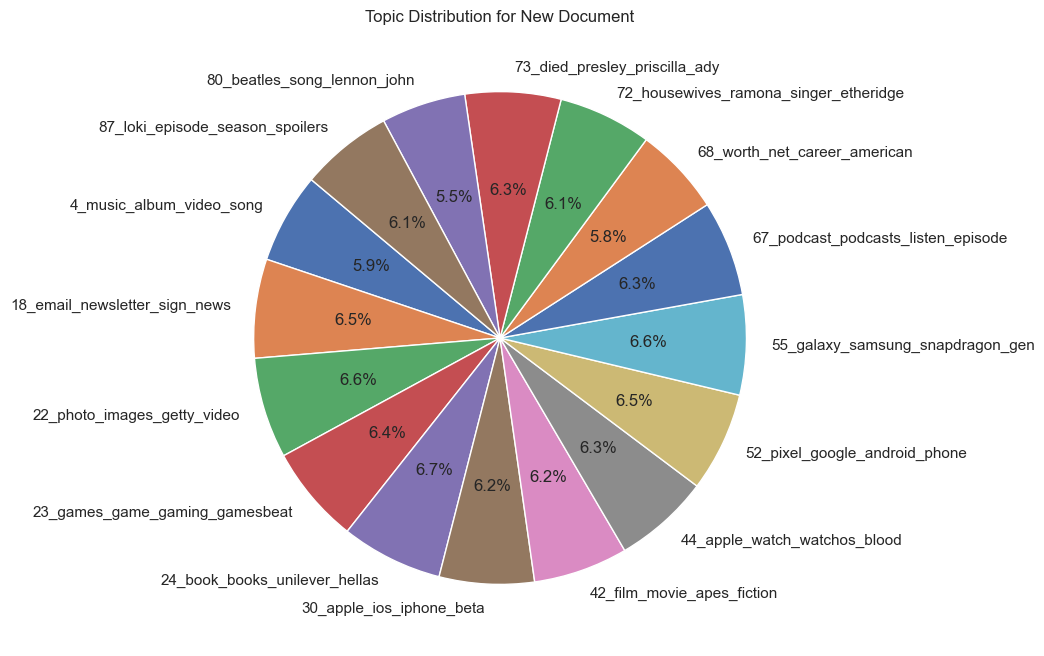

In [75]:


# Example new document
new_document = "The stock market is experiencing a major shift with tech companies leading the surge."

# Get the topic and probability distribution
topic, probabilities = topic_model.transform([new_document])

# Extract topic names and probabilities
topics = topic_model.get_topic_info()  # Get topic names
topic_labels = topics.set_index("Topic")["Name"].to_dict()
topic_labels = {k: topic_labels[k] if k in topic_labels else f"Topic {k}" for k in range(len(probabilities[0]))}

# Prepare data for visualization
top_topics = {topic_labels[i]: prob for i, prob in enumerate(probabilities[0]) if prob > 0.01}  # Filter significant probabilities
labels = list(top_topics.keys())
values = list(top_topics.values())

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Topic Distribution for New Document")
plt.show()


In [65]:
# import pandas as pd

# Assuming 'samplesentenceList' is your list of documents used in training
# Example input topic_id
topic_id = 3  # Replace with the topic ID you want to get the top documents for

# Get the topic probabilities for each document
topic_probabilities = topic_model.transform(samplesentenceList)[1]  # Get probabilities for all docs

# Create a DataFrame to store documents and their corresponding probabilities for the given topic
topic_prob_df = pd.DataFrame({
    'document': samplesentenceList,
    'probability': [prob[topic_id] for prob in topic_probabilities]
})

# Sort by probability and select top 10 documents
top_documents = topic_prob_df.sort_values(by='probability', ascending=False).head(10)

# Display the top 10 documents
print(top_documents[['document', 'probability']])



Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2024-11-15 14:32:00,370 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-15 14:32:00,396 - BERTopic - Dimensionality - Completed ✓
2024-11-15 14:32:00,397 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-15 14:32:00,555 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-11-15 14:32:02,616 - BERTopic - Probabilities - Completed ✓
2024-11-15 14:32:02,617 - BERTopic - Cluster - Completed ✓


                                               document  probability
234   torontos housing slumped ber sales prices fall...          1.0
6088  calculated risk real estate newsletter week pa...          1.0
343   seventh month row average prices existing home...          1.0
354   home prices continue rise starter home major c...          1.0
3941  home affordability plunged since imagesullius ...          1.0
5979  largely recovered pandemic housing crisis endu...          1.0
3129  housing hobbled deshigh mortgage rates stubbor...          1.0
4751  multiple degrees use hard drugsi lost job covi...          1.0
9739  budgets getting relief right daily average rat...          1.0
6081  nullgetty imagesullihigh home prices mortgage ...          1.0


In [55]:
# New dataset for prediction
new_documents = [
    "The stock market shows strong growth today",
    "The latest developments in AI are very exciting"
]

# Transform new data to predict topics
new_topics, new_probabilities = topic_model.transform(new_documents)

print("Predicted Topics:", new_topics)
print("Topic Probabilities:", new_probabilities)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-11 22:43:11,815 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-11 22:43:17,317 - BERTopic - Dimensionality - Completed ✓
2024-11-11 22:43:17,317 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-11 22:43:17,321 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-11-11 22:43:17,333 - BERTopic - Probabilities - Completed ✓
2024-11-11 22:43:17,333 - BERTopic - Cluster - Completed ✓


Predicted Topics: [0, -1]
Topic Probabilities: [[6.97151843e-01 1.20015386e-03 5.16781230e-03 5.51971245e-04
  1.91398228e-03 2.38470009e-03 2.36524943e-03 3.25127701e-03
  3.09704793e-03 5.10968532e-03 1.02697994e-03 2.61637920e-03
  3.54009348e-03 9.89580253e-04 1.18843519e-03 3.06509814e-03
  1.64092938e-03 1.94981276e-03 9.61618924e-04 6.89632321e-04
  9.48818913e-04 9.38677610e-04 8.43920663e-04 6.23418700e-04
  2.78357359e-04 3.16200634e-04 2.54555751e-04 2.67783766e-04
  3.04470266e-04]
 [3.08865232e-01 5.22943029e-19 3.78428626e-17 1.09858359e-19
  3.45641009e-15 3.46320587e-19 6.35876993e-17 1.06807703e-18
  1.77497855e-01 3.80976128e-01 1.54949677e-19 6.91618051e-18
  1.34245651e-08 3.38972335e-19 3.19591416e-19 2.74983996e-15
  5.20552376e-19 1.16639326e-17 2.00471248e-18 2.87965009e-19
  1.14216824e-19 2.52213768e-19 2.70418993e-19 2.87111712e-18
  1.71798408e-20 2.48709347e-18 3.42460461e-21 1.85785833e-20
  5.44611823e-20]]


In [56]:

# Assuming the topic_model is already trained
# topic_model = BERTopic(...)  # Already trained on your news dataset

# 1. Create a testing dataset with 20 different news articles
testing_documents = [
    "Stock market hits record highs as tech stocks surge",
    "Health experts warn of new virus variant spreading globally",
    "New advancements in AI are revolutionizing the tech industry",
    "The government has announced a new education reform program",
    "Real estate prices continue to rise in major cities",
    "COVID-19 cases are rising again due to the Delta variant",
    "The latest tech gadgets you should buy in 2024",
    "Economic downturn is affecting small businesses in the country",
    "Scientists discover a new treatment for cancer",
    "Job market trends show an increase in remote job offers",
    "Investors are optimistic about the future of green energy",
    "Music streaming services see a surge in subscriptions",
    "Weather predictions indicate a mild winter ahead",
    "Politicians debate over new tax reforms in Congress",
    "The stock market sees a sharp decline as inflation rises",
    "Travel restrictions are being eased as vaccination rates increase",
    "Electric cars become more affordable for average consumers",
    "New research shows climate change is accelerating faster than expected",
    "The real estate market is cooling down after years of growth",
    "Scientists urge action on climate change after shocking report"
]

# 2. Preprocess the new data (optional: depending on your initial preprocessing steps)
# For example, you could clean the text, remove stop words, etc.
# Preprocessing step is optional, depending on what you did for the training dataset.

# 3. Use transform() to predict topics for the new documents
new_topics, new_probabilities = topic_model.transform(testing_documents)

# 4. Visualizing the topics for the new dataset



# Visualizing the topics using the topic hierarchy (dendrogram)
topic_model.visualize_hierarchy()

# Optionally, you can visualize the topics using the scatter plot
topic_model.visualize_topics()

# If you have topic probabilities, you can also inspect them:
print("Predicted Topics for New Documents:", new_topics)
print("Topic Probabilities for New Documents:", new_probabilities)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-11 22:47:08,091 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-11 22:47:08,116 - BERTopic - Dimensionality - Completed ✓
2024-11-11 22:47:08,117 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-11 22:47:08,120 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-11-11 22:47:08,145 - BERTopic - Probabilities - Completed ✓
2024-11-11 22:47:08,146 - BERTopic - Cluster - Completed ✓


Predicted Topics for New Documents: [-1, 11, 9, -1, 14, 11, -1, -1, 11, 8, -1, 2, 5, 12, 0, 11, 1, 5, 14, -1]
Topic Probabilities for New Documents: [[8.89031166e-001 3.71801703e-013 3.78798110e-012 1.61320788e-013
  1.48771278e-012 7.29009472e-013 1.82693883e-012 1.22564628e-012
  1.82655018e-011 2.20912650e-011 2.90292776e-013 1.35894105e-012
  3.06087892e-012 3.89979462e-013 4.31033802e-013 2.24973334e-012
  6.41680249e-013 1.23035724e-012 5.19588622e-013 2.69385829e-013
  2.68962128e-013 3.24520246e-013 2.81827159e-013 3.29956344e-013
  5.84072376e-014 2.40308874e-013 3.17524535e-014 5.37487712e-014
  9.28104766e-014]
 [3.82641652e-002 8.57532890e-003 3.34388252e-002 5.17119169e-003
  1.16347246e-002 2.24054263e-002 1.78937849e-002 2.41508291e-002
  1.23730489e-002 2.44580413e-002 7.15463069e-003 1.00291366e-001
  1.96214790e-002 1.11544050e-002 7.01049680e-003 1.73068297e-002
  1.10548004e-002 1.39409060e-002 6.94568205e-003 7.07571691e-003
  8.17902579e-003 1.03495145e-002 1.0609

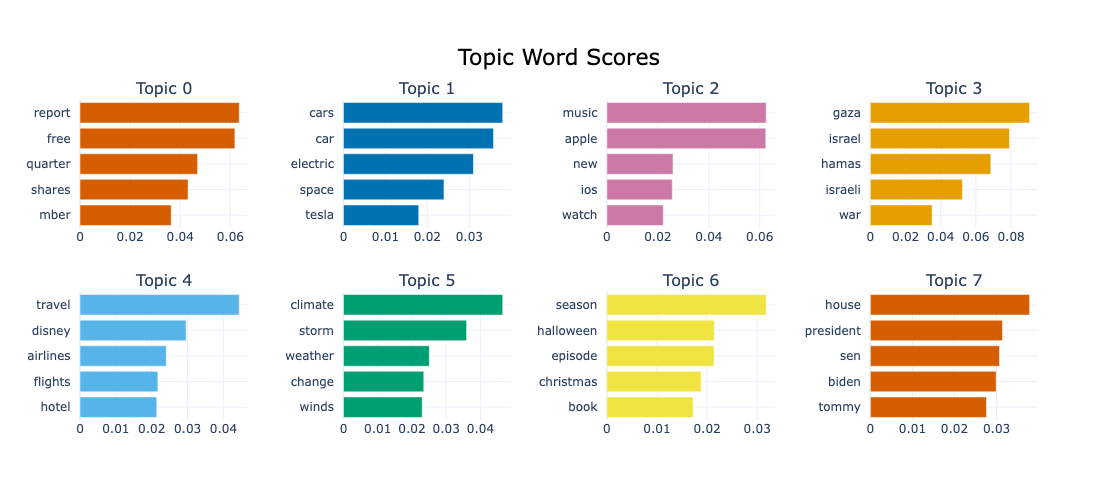

In [57]:
# Visualizing topic distribution using the bar chart
topic_model.visualize_barchart()

In [59]:
# Assuming the topic_model is already trained on the original dataset

# 1. Create a testing dataset with 20 different news articles
testing_documents = [
    "Stock market hits record highs as tech stocks surge",
    "Health experts warn of new virus variant spreading globally",
    "New advancements in AI are revolutionizing the tech industry",
    "The government has announced a new education reform program",
    "Real estate prices continue to rise in major cities",
    "COVID-19 cases are rising again due to the Delta variant",
    "The latest tech gadgets you should buy in 2024",
    "Economic downturn is affecting small businesses in the country",
    "Scientists discover a new treatment for cancer",
    "Job market trends show an increase in remote job offers",
    "Investors are optimistic about the future of green energy",
    "Music streaming services see a surge in subscriptions",
    "Weather predictions indicate a mild winter ahead",
    "Politicians debate over new tax reforms in Congress",
    "The stock market sees a sharp decline as inflation rises",
    "Travel restrictions are being eased as vaccination rates increase",
    "Electric cars become more affordable for average consumers",
    "New research shows climate change is accelerating faster than expected",
    "The real estate market is cooling down after years of growth",
    "Scientists urge action on climate change after shocking report"
]

# 2. Preprocess the new data if necessary (optional step)

# 3. Use the transform() method to predict topics for the new documents
new_topics, new_probabilities = topic_model.transform(testing_documents)

# 4. Get the top words for each topic
# For the new data, you can check the topics and words assigned
topics_info = topic_model.get_topics()

# Print out the topics for the new dataset to inspect
print("Predicted Topics for New Documents:", new_topics)

# 5. Visualize only the top words for the topics in the new dataset

# Visualizing the topics based on the words associated with each topic
topic_model.visualize_barchart(top_n_topics=10)  # Top 10 topics
topic_model.visualize_topics()

# If you want a specific number of top words to be visualized, you can extract them manually.
# For example, you can print out the top 10 words for each topic:

for topic_num, words in topics_info.items():
    top_words = [word for word, _ in words[:10]]  # Get the top 10 words for the topic
    print(f"Topic {topic_num}: {', '.join(top_words)}")




Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-11 22:52:11,196 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-11-11 22:52:11,210 - BERTopic - Dimensionality - Completed ✓
2024-11-11 22:52:11,210 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-11-11 22:52:11,212 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-11-11 22:52:11,236 - BERTopic - Probabilities - Completed ✓
2024-11-11 22:52:11,236 - BERTopic - Cluster - Completed ✓


Predicted Topics for New Documents: [-1, 11, 9, -1, 14, 11, -1, -1, 11, 8, -1, 2, 5, 12, 0, 11, 1, 5, 14, -1]
Topic -1: new, one, company, years, apple, technology, report, research, thursday, ceo
Topic 0: report, free, quarter, shares, mber, recent, company, according, filing, earnings
Topic 1: cars, car, electric, space, tesla, vehicles, elon, musk, vehicle, new
Topic 2: music, apple, new, ios, watch, album, song, released, iphone, release
Topic 3: gaza, israel, hamas, israeli, war, strip, palestinian, killed, attack, israels
Topic 4: travel, disney, airlines, flights, hotel, day, holiday, flight, air, india
Topic 5: climate, storm, weather, change, winds, air, rain, ciaran, ciar, quality
Topic 6: season, halloween, episode, christmas, book, loki, holiday, photo, books, time
Topic 7: house, president, sen, biden, tommy, joe, tuberville, speaker, republican, skip
Topic 8: jobs, job, workers, labor, ber, unemployment, cut, hiring, rate, strike
Topic 9: leaders, executive, enterprise, v

In [68]:
def load_dataset():
    import json
    with open("samplesentenceList.json", "r") as file:
        return json.load(file)

docs = load_dataset()


In [69]:
type(docs)

list